In [36]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm

In [37]:
# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device='cpu'
print(device)

cpu


In [38]:
main_folder = "./iith-dl-contest-2024/train/train"

In [39]:
# Define a transform to read the data in as a tensor
transform = transforms.Compose([transforms.Resize((224, 224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Load the training data
train_data = datasets.ImageFolder(main_folder, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
print("Data loaded")
print("Number of training samples: ", len(train_data))
# print shape of training data
print("Shape of training data: ", train_data[0][0].shape)
print(train_data.classes)
print("Number of classes: ", len(train_data.classes))

Data loaded
Number of training samples:  65000
Shape of training data:  torch.Size([3, 224, 224])
['n01443537', 'n01774750', 'n01784675', 'n01882714', 'n01910747', 'n01944390', 'n01983481', 'n02056570', 'n02085620', 'n02094433', 'n02099601', 'n02099712', 'n02106662', 'n02190166', 'n02206856', 'n02226429', 'n02233338', 'n02236044', 'n02268443', 'n02279972', 'n02364673', 'n02395406', 'n02410509', 'n02423022', 'n02480495', 'n02481823', 'n02486410', 'n02769748', 'n02793495', 'n02802426', 'n02808440', 'n02814860', 'n02843684', 'n02906734', 'n02948072', 'n02950826', 'n03424325', 'n03649909', 'n04133789', 'n04146614', 'n04275548', 'n04465501', 'n07695742', 'n07720875', 'n07734744', 'n07753592', 'n07768694', 'n07873807', 'n07920052', 'n12267677']
Number of classes:  50


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


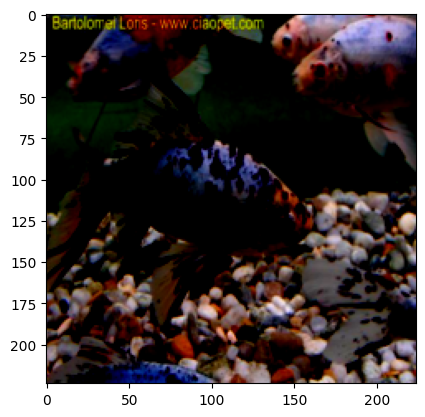

In [40]:
# print a sample image
import matplotlib.pyplot as plt
image, label = train_data[0]
plt.imshow(image.permute(1, 2, 0))
plt.show()

In [41]:
# VGG16 model
class VGG16(nn.Module):
    def __init__(self,num_classes=50):
        super(VGG16, self).__init__()
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(512 * 7 * 7, 4096)
        self.fc2 = nn.Linear(4096, 4096)
        self.fc3 = nn.Linear(4096, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1_1(x))
        x = F.relu(self.conv1_2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv2_1(x))
        x = F.relu(self.conv2_2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv3_1(x))
        x = F.relu(self.conv3_2(x))
        x = F.relu(self.conv3_3(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv4_1(x))
        x = F.relu(self.conv4_2(x))
        x = F.relu(self.conv4_3(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = F.relu(self.conv5_1(x))
        x = F.relu(self.conv5_2(x))
        x = F.relu(self.conv5_3(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = x.view(-1, 512 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# Create an instance of the model
model = VGG16().to(device)
# Print the model architecture
print(model)

VGG16(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_1): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4_3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5_3): Conv2d(512, 51

In [42]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 10
total_step = len(train_loader)
for epoch in range(num_epochs):
    total_loss = 0
    for i, (images, labels) in tqdm(enumerate(train_loader)):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
    print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, total_loss))

9it [05:21, 35.74s/it]


KeyboardInterrupt: 

In [ ]:
from PIL import Image
import os
import torchvision.transforms as transforms
import torch

test_data_dir = './iith-dl-contest-2024/test/test'  # Path to the test data directory

# Get a list of all files in the test directory
test_files = os.listdir(test_data_dir)

# Initialize a list to store test tensors
test_tensors = []

# Define the transformation pipeline
transform=transform

# Iterate over all files and apply the transformation pipeline
for file_name in test_files:
    file_path = os.path.join(test_data_dir, file_name)
    if os.path.isfile(file_path):
        image = Image.open(file_path)
        # print image name 
        if image.mode != 'RGB':
            image = image.convert('RGB')
        tensor = transform(image)
        test_tensors.append(tensor)

# Now test_tensors is a list containing all the transformed test tensors


In [ ]:
print("Number of test samples: ", len(test_tensors))

In [ ]:
# predict and save the results in  submission.csv file format index, label
# ID,Category
import csv
model.eval()
with open('submission.csv', mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['ID', 'Category'])
    for i, data in enumerate(test_tensors):
        data = data.unsqueeze(0).to(device)
        output = model(data)
        _, pred = torch.max(output, 1)
        # string format i.JPEG, label
        custom_name = str(i) + '.JPEG'
        writer.writerow([custom_name, train_data.classes[pred.item()]])